# action
- 客户端可以获取4种形式的操作
    - false: 如果当前action对话框是展开的，则表示关闭它
    - string：如果客户端操作匹配，则将其解释为客户端操作的标记，否则将其视为数字
    - number：identifier或者external_id
    - dict：将其视为客户端操作描述符并执行
            action = {
                    'type': 'ir.actions.act_window',
                    "name": "我的日报",
                    'views': [[view_tree_id, 'list'], [view_form_id, 'form']],
                    'view_mode': 'tree,form',
                    'domain': "[('create_uid','=',uid)]",
                    "res_model": "daily_report.daily_report",
                }

# odoo中的视图动作类型
- 可以细分为以下六种：
        URL Actions (ir.actions.act_url)
        Server Actions (ir.actions.server)
        Report Actions (ir.actions.report)
        Client Actions (ir.actions.client)
        Automated Actions (ir.cron)


# 关于action的一些方法
- get_formview_action()
    - 获取某个动作的具体内容
    - self.env.ref('metro_construction.set_principal_obtain_expire_date').get_formview_action()
- report_action():
    - 获取report动作的具体内容
    - self.env.ref('expense_account.invoice_report').report_action(self)

# 父动作:ir.actions.actions
- 所有类型的动作都继承于ir.actions.actions
- 该动作的属性是所继承的动作所共有的
- 属性如下：
    - 必有属性：
        - type：当前操作的类别，决定可以使用哪些字段以及如何解释该操作。
        - name：简短的用户可读的动作描述，可以显示在客户端的界面上。
    - 可选属性：
    - binding_model_id：指定动作绑定到哪个模型
        - 如果是sever action，使用model_id
    - binding_type：指定绑定的动作类型，
        - action (default)：指定操作将出现在绑定模型的操作上下文菜单中。
        - report：指定操作将出现在绑定模型的“打印上下文”菜单中。只有ir.actions.report才会使用到，其余的都是action
    - binding_view_types：
        - 绑定的视图类型，默认是list,form
        - field name="binding_view_types">list,form</field
    - help
        - 用户的可选帮助文本，描述目标视图，比如它的用法和用途。
                <field name="help" type="html">
                    <p class="o_view_nocontent_smiling_face">
                        There are no transactions yet.
                    </p>
                </field>

# ir.actions.act_window
- 最常见的操作类型，用于通过视图呈现模型的可视化:窗口操作为模型定义了一组视图类型(可能是特定的视图)(也可能是特定的模型记录)。
- 属性
    - name：简短的用户可读的动作描述，可以显示在客户端的界面上。
    - type：一般是ir.actions.act_window
    - res_model:该动作将在哪个模型上执行
    - view_mode:视图类型，默认是list,form
    - res_id:是某条记录的id，表示的是：当且仅当view_mode为form时，可设置res_id,打开指定的记录的form视图
    - domain：用来筛选得到想要的结果
    - views: 
        - 该字段一般是在.py文件中返回action时用到，xml中无法使用
        - 由 (view_id, view_type) 这样的元组对组成的列表。每一对中的第二个元素是视图的类别(树、表单、图……)，第一个元素是一个可选的数据库id(或False)。如果没有提供id，客户机应该为请求的模型获取指定类型的默认视图(这是由fields_view_get()自动完成的)。列表的第一种类型是默认视图类型，在执行操作时默认打开。每种视图类型最多只能在列表中出现一次
        - views 是一个计算字段，该字段会根据 view_ids, view_mode 和 view_id 自动计算出来，大致分为三个步骤：
            - 1.从 view_ids 中顺序取出 id 和视图类型，组成 (view_id, view_type) 元组对加入到 views 列表中
            - 2.若定义了 view_id 且对应的视图类型不在 view_ids 中，则加入到 views 中
            - 3.最后对 view_mode 中指定的视图类型，但是不存在于 view_ids 和 view_id 中，则将其 view_id 置为 False 组成元组对后加入到 views 中
    - view_id: 指定打开的是哪一个视图，例如在不同时候需要打开同一个数据模型不同的表单视图，就可以通过这个字段指定要打开的视图的。
            <field name="view_id" ref="project.view_task_form2"/>
    - view_ids:类似一个many2many类型，表示新增这个动作对应的视图
            <field name="view_ids" eval="[(5, 0, 0),
                (0, 0, {'view_mode': 'tree', 'view_id': ref('role_setting_tree')}),
                (0, 0, {'view_mode': 'form', 'view_id': ref('role_setting_form')})]"/>
                
            <field name="view_ids" eval="[Command.clear(),
                  (0,0,{'view_mode':'tree'}),
                  (0,0,{'view_mode':'form', 'view_id': ref('discussion_form_2')})]"/>
    - context：是一个Python表达式，传递给视图的上下文数据
            <field name="context">{"search_default_active":1}</field>
    - search_view_id:指定搜索视图
            <field name="search_view_id" ref="view_l10n_latam_identification_type_search"/>
    - target:
        - current:当前窗口打开
        - new：新增窗口打开
        - inline：直接编辑
        - main：当前窗口的主要动作
        - fullscreen:全屏
    - limit:对tree视图，限制每个tree视图中的记录数
    - filter:是否过滤，不知道用来干啥
            <field name="filter" eval="True"/>
    - groups_id:该动作针谁有权限调用
            <field name="groups_id"  eval="[(4, ref('base.group_user'))]"/>
            
# ir.actions.url
- 允许打开一个URL(网站/网页)通过Odoo的行动。
- 可以通过两个字段自定义:
    - url 
    - target
        - self
        - new,self表示替换当前的网页，new打开新的网页)
- 举例：该段代码表示将由url中的地址，取代当前页面
        {
            "type": "ir.actions.act_url",
            "url": "https://odoo.com",
            "target": "self",
        }
        
# ir.actions.server
- 属性
    - name
    - type
    - state:
        - code:表示执行Python代码，该代码中可用的变量有：
             - env: Odoo Environment on which the action is triggered
             - model: Odoo Model of the record on which the action is triggered; is a void recordset
             - record: record on which the action is triggered; may be void
             - records: recordset of all records on which the action is triggered in multi-mode; may be void
             - time, datetime, dateutil, timezone: useful Python libraries
             - float_compare: Odoo function to compare floats based on specific precisions
             - log: log(message, level='info'): logging function to record debug information in ir.logging table
             - UserError: Warning Exception to use with raise
             - Command: x2Many commands namespace
        - object_create：创建一条新纪录
        - object_write：重写记录
        - multi：执行多个server动作
    - model_id：该动作执行的模型
    - crud_model_id：
        - 指定将要被修改的模型（除开本模型），该字段是state为object_create,object_write才可能需要指定
    - link_field_id:state为object_create使用,提供用于将新创建的记录链接到server操作使用的记录上的字段
    - fields_lines:该字段是state为object_create,object_write才可能需要指定
        - 
    - child_ids :state为multi时，表示执行的字server动作
        - Specify the multiple sub-actions (ir.actions.server) to enact in state multi. If sub-actions themselves return actions, the last one will be returned to the client as the multi’s own next action
        
# ir.actions.report
- 打印报表：需要与views一样新建一个同级Python package ，report包，该report下需要放入定义的模型文件，模板文件，同时模板文件需要引入到manifiest文件中。如果想要在勾选记录的时候可以有打印选项，需要开启debug模式对reports进行设置，将你设置的report动作加入到print中
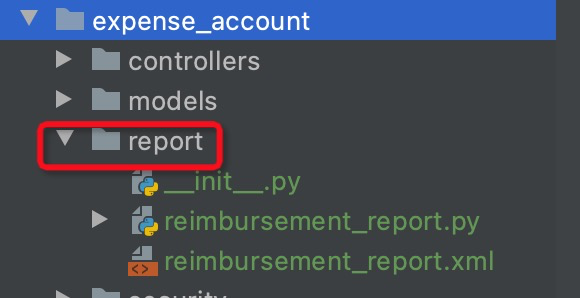
- 如果您通过< record>而不是< report>标签定义报表，并且希望该操作显示在模型视图的打印菜单中，您还需要从Bindings中指定binding_model_id。没有必要设置binding_type来报告，因为ir.actions.report将默认设置为report。
- 属性有：
    - name (mandatory)：如果未指定print_report_name，则用作文件名。否则，只有在从某种类型的列表中查找时，才可用作报表的助记符/描述
    - model (mandatory)：你的报告将涉及的模型
    - report_type (default=qweb-pdf)：
        - qweb-html
        - qweb-pdf
        - qweb-text
        - qweb-pdf用于PDF报告(即直接下载后再打印），qweb-html用于HTML报告（先预览后再打印）
    - report_name (mandatory)：用于呈现报表的qweb模板的名称(外部id)
    - print_report_name：定义报表名称的python表达式
    - groups_id：Many2many 字段设置为允许查看/使用当前报表的组
    - multi ：如果设置为True，该操作将不会在表单视图中显示
    - paperformat_id：Many2one字段到您希望用于本报告的论文格式(如果未指定，将使用公司格式)
    - attachment_use： 
        - 如果设置为True，则报告只在第一次请求时生成一次，然后从存储的报告中重新打印，而不是每次都重新生成。
        - 可以用于只能生成一次的报告(例如，出于法律原因)
    - attachment：定义报表名称的python表达式;记录可以作为变量对象访问
    - 注：这个id在写这个模型名称的时候需要加进去
- 示例
        <odoo>
            <data>
                # 这是打印纸格式定义文件
                <record id="paperformat_euro_no_margin" model="report.paperformat">
                    <field name="name">European A4 without borders</field>
                    <field name="default" eval="False" />
                    <field name="format">A4</field>
                    <field name="orientation">Portrait</field>
                    <field name="margin_top">0</field>
                    <field name="margin_bottom">0</field>
                    <field name="margin_left">0</field>
                    <field name="margin_right">0</field>
                    <field name="header_line" eval="False" />
                    <field name="header_spacing">0</field>
                </record>
                
                # 这个report的id在定义模型名称的时候需要用到，其实不是必须的
                <record id="borrow_report" model="ir.actions.report">
                    <field name="name">借款单发票</field>
                    <field name="model">expense_account.dispatch.list</field>
                    <field name="report_type">qweb-html</field>
                    <field name="report_name">expense_account.borrow_report_template</field>
                    <field name="report_file">expense_account.borrow_report_template</field>
                    <field name="paperformat_id" ref="expense_account.paperformat_euro_no_margin"/>
                </record>
                
                # 这个template的id在定义模型名称的时候需要用到，必须的
                <template id="borrow_report_template">
                    <t t-call="web.html_container">
                        <t t-foreach="docs" t-as="o">   

                            <div class="swissqr_content">

                            </div>
                        </t>
                    </t>

                </template>

            </data>
        </odoo>
        
        #定义打印模型，必须是models.AbstractModel,且_get_report_values方法必须有，是在渲染template会调用这个函数获取docs
        
        class ReportInvoice(models.AbstractModel):
            # 这里定义名称的时候是：report+打印模型涉及到的模型名称+定义的report动作的report_name
            _name = 'report.borrow_report.borrow_report_template'
            _description = '发票打印'

            @api.model
            def _get_report_values(self, docids, data=None):
                docs = self.env['expense_account.dispatch.list'].browse(docids)
                qr_code_urls = {}

                return {
                    'doc_ids': docids,
                    'doc_model': 'expense_account.dispatch.list',
                    'docs': docs,
                }
        
# ir.actions.client
- 触发一个完全在客户端中实现的操作。
- 属性：
    - name
    - type
    - tag:客户端自己定义并自己解释的
    - params：随着tag一起传递给客户端的dict参数
    - target：视图的打开方式,默认current
        - current
        - new
        - fullscreen
        - main
    - context：Python表达式的字典，默认为空
    - res_model:指定该动作涉及的模型，可选
- 示例：
        <record id="action_stock_report" model="ir.actions.client">
            <field name="name">Traceability Report</field>
            <field name="tag">stock_report_generic</field>
            <field name="context" eval="{'url': '/stock/output_format/stock/active_id', 'model': 'stock.traceability.report'}" />
        </record>
        
# ir.cron
- 动作自动触发在预先设定的频率。
- 属性有：
    - name 自动操作的名称(主要用于日志显示)
    - interval_number 两次执行该操作之间的interval_type uom数目
    - interval_type 频率间隔的测量单位
    - numbercall 操作必须运行的次数。如果该操作预计将无限期运行，则将其设置为-1
    - doall 布尔警告在服务器重启的情况下是否必须执行错过的操作。
    - model_id 此操作将在其上调用的模
    - code 动作的代码内容。可以简单调用模型的方法
    - nextcall 此动作的下一次计划执行日期(日期/时间格式)